In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
key_stats_df = pd.read_csv('/Users/galacticorm/Desktop/Master_DS&AI/Football Data/archive/key_stats.csv')
goals_df = pd.read_csv('/Users/galacticorm/Desktop/Master_DS&AI/Football Data/archive/goals.csv')

In [3]:
key_stats_df.head(),goals_df.head()

(       player_name         club    position  minutes_played  match_played  \
 0         Courtois  Real Madrid  Goalkeeper            1230            13   
 1  Vinícius Júnior  Real Madrid     Forward            1199            13   
 2          Benzema  Real Madrid     Forward            1106            12   
 3           Modrić  Real Madrid  Midfielder            1077            13   
 4     Éder Militão  Real Madrid    Defender            1076            12   
 
    goals  assists distance_covered  
 0      0        0             64.2  
 1      4        6            133.0  
 2     15        1            121.5  
 3      0        4            124.5  
 4      0        0            110.4  ,
    serial  player_name         club    position  goals  right_foot  left_foot  \
 0       1      Benzema  Real Madrid     Forward     15          11          1   
 1       2  Lewandowski       Bayern     Forward     13           8          3   
 2       3       Haller         Ajax     Forward     11

In [4]:
# Merge the two datasets

merged_df = pd.merge(key_stats_df, goals_df, on=['player_name','club'])

merged_df.head()

,player_name,club,position_x,minutes_played,match_played_x,goals_x,assists,distance_covered,serial,position_y,goals_y,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played_y
0,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,16,Forward,4,3,1,0,0,4,0,0,13
1,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1,Forward,15,11,1,3,0,13,2,3,12
2,Alaba,Real Madrid,Defender,1040,12,1,0,112.3,73,Defender,1,0,1,0,0,0,1,0,12
3,Kroos,Real Madrid,Midfielder,902,12,2,0,116.5,43,Midfielder,2,1,1,0,0,0,2,0,12
4,Rodrygo,Real Madrid,Forward,505,11,5,2,65.7,12,Forward,5,2,2,1,0,5,0,0,10


In [5]:
# Drop unnecessary columns

cleaned_df = merged_df.drop(columns = ['serial','position_y','goals_x'])

# Rename columns

cleaned_df.rename(columns={'goals_y': 'goals'}, inplace=True)

missing_values_after_cleaning = cleaned_df.isnull().sum()


# Display the first few rows of the cleaned data
cleaned_df.head(), missing_values_after_cleaning

(       player_name         club  position_x  minutes_played  match_played_x  \
 0  Vinícius Júnior  Real Madrid     Forward            1199              13   
 1          Benzema  Real Madrid     Forward            1106              12   
 2            Alaba  Real Madrid    Defender            1040              12   
 3            Kroos  Real Madrid  Midfielder             902              12   
 4          Rodrygo  Real Madrid     Forward             505              11   
 
    assists distance_covered  goals  right_foot  left_foot  headers  others  \
 0        6            133.0      4           3          1        0       0   
 1        1            121.5     15          11          1        3       0   
 2        0            112.3      1           0          1        0       0   
 3        0            116.5      2           1          1        0       0   
 4        2             65.7      5           2          2        1       0   
 
    inside_area  outside_areas  penalties 

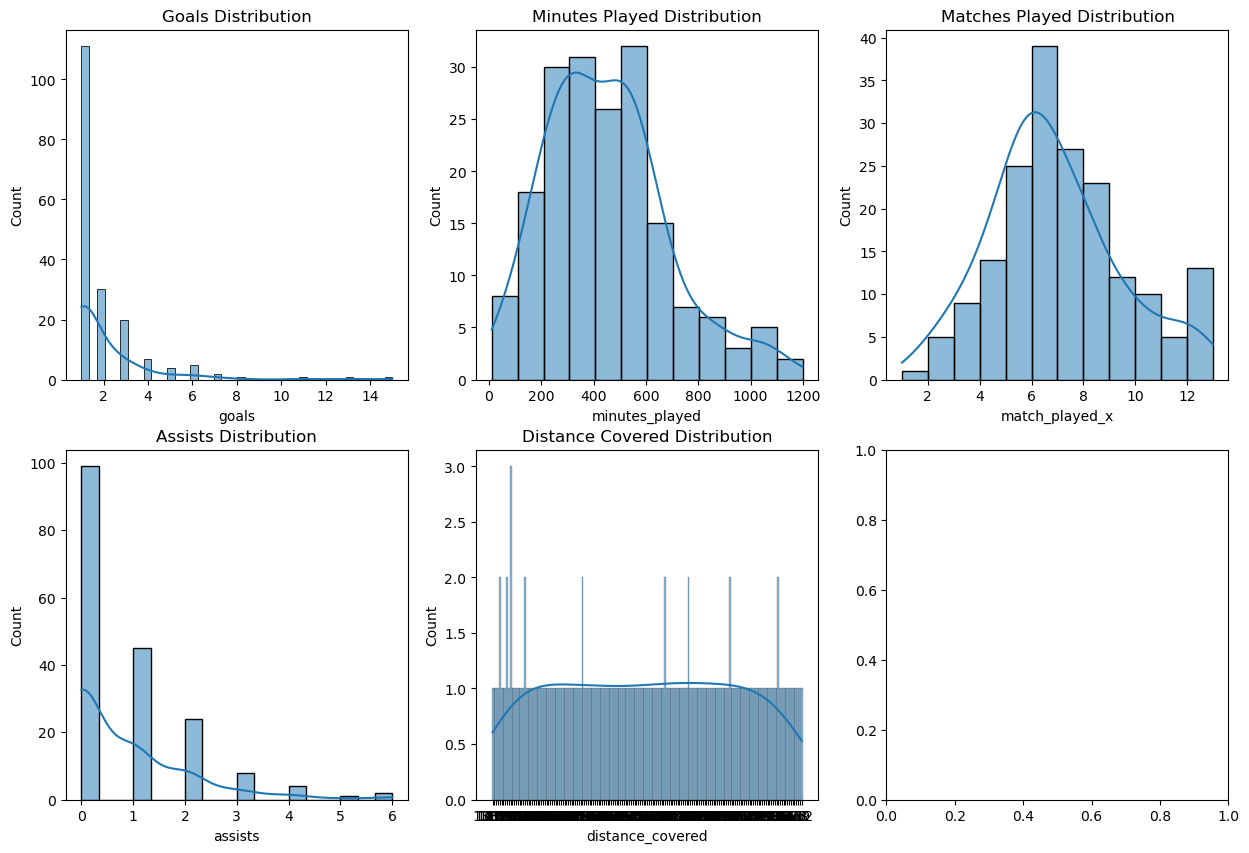

In [6]:
# Plot the distribution of the target variable and input features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Target variable distribution
sns.histplot(cleaned_df['goals'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Goals Distribution')

# Input features distribution
sns.histplot(cleaned_df['minutes_played'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Minutes Played Distribution')

sns.histplot(cleaned_df['match_played_x'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Matches Played Distribution')

sns.histplot(cleaned_df['assists'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Assists Distribution')

sns.histplot(cleaned_df['distance_covered'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distance Covered Distribution')


plt.show()

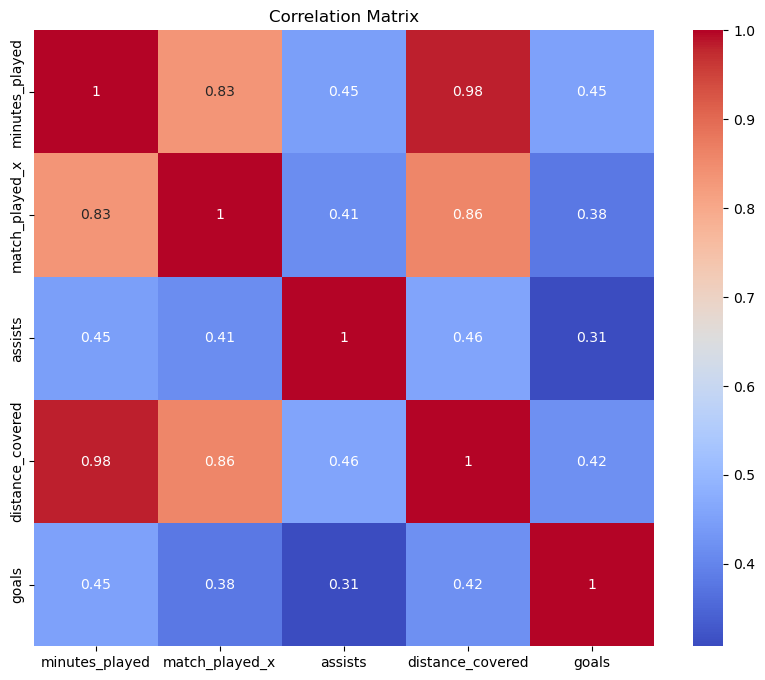

In [7]:
# Correlation analysis
correlation_matrix = cleaned_df[['minutes_played', 'match_played_x', 'assists', 'distance_covered', 'goals']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Feature selection
features = ['minutes_played', 'match_played_x', 'assists', 'distance_covered']
target = 'goals'

# Split the dataset
X = cleaned_df[features]
y = cleaned_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((146, 4), (37, 4), (146,), (37,))

In [9]:
# Initialize models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)
forest_model = RandomForestRegressor(random_state=42)

# Train models
linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)

# Predict
linear_preds = linear_model.predict(X_test)
tree_preds = tree_model.predict(X_test)
forest_preds = forest_model.predict(X_test)

# Evaluate models
linear_mse = mean_squared_error(y_test, linear_preds)
tree_mse = mean_squared_error(y_test, tree_preds)
forest_mse = mean_squared_error(y_test, forest_preds)

linear_rmse = np.sqrt(linear_mse)
tree_rmse = np.sqrt(tree_mse)
forest_rmse = np.sqrt(forest_mse)

{
    'Linear Regression RMSE': linear_rmse,
    'Decision Tree RMSE': tree_rmse,
    'Random Forest RMSE': forest_rmse
}

{'Linear Regression RMSE': 1.4455676239884427,
 'Decision Tree RMSE': 2.3709959134552765,
 'Random Forest RMSE': 1.7964288899805516}

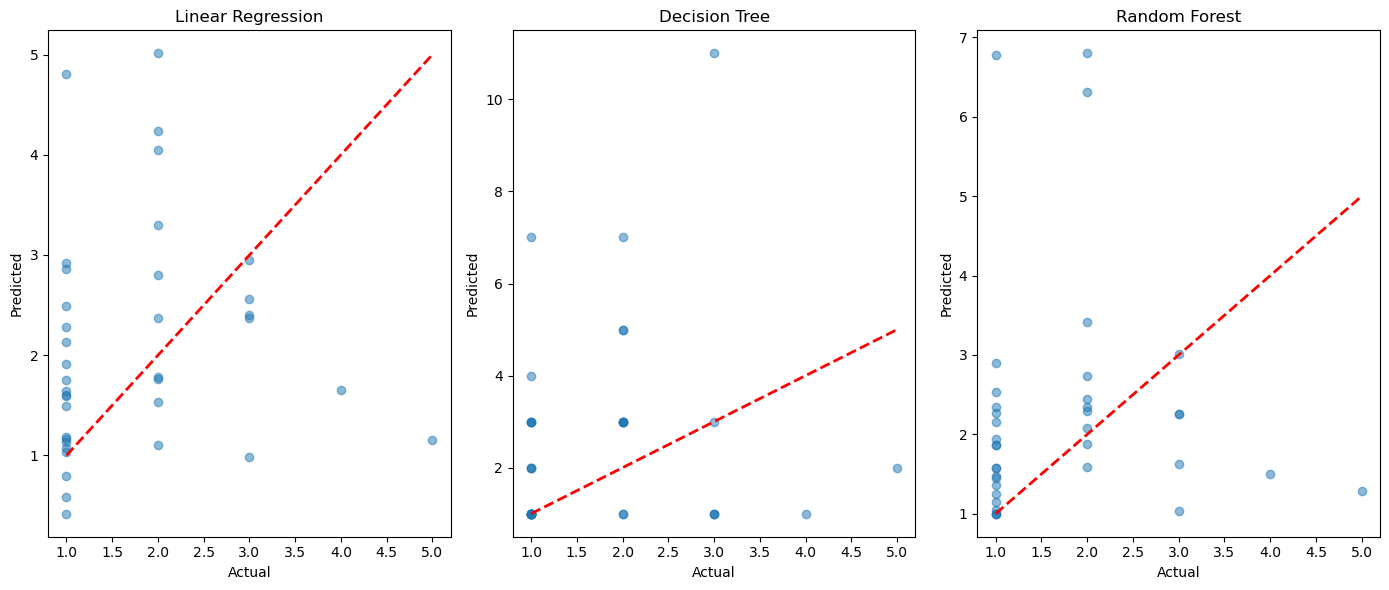

In [10]:
# Visualize actual vs predicted values
plt.figure(figsize=(14, 6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, linear_preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

# Decision Tree
plt.subplot(1, 3, 2)
plt.scatter(y_test, tree_preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree')

# Random Forest
plt.subplot(1, 3, 3)
plt.scatter(y_test, forest_preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')

plt.tight_layout()
plt.show()

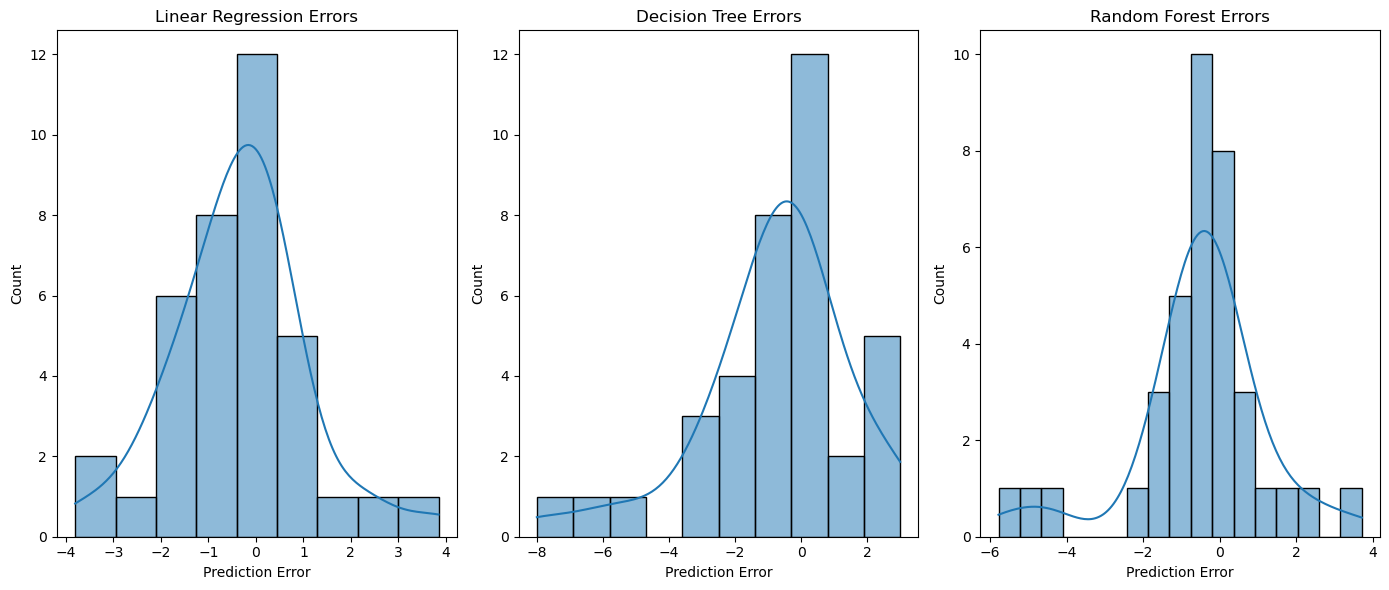

In [11]:
# Analyze model prediction errors
plt.figure(figsize=(14, 6))

# Linear Regression errors
plt.subplot(1, 3, 1)
linear_errors = y_test - linear_preds
sns.histplot(linear_errors, kde=True)
plt.xlabel('Prediction Error')
plt.title('Linear Regression Errors')

# Decision Tree errors
plt.subplot(1, 3, 2)
tree_errors = y_test - tree_preds
sns.histplot(tree_errors, kde=True)
plt.xlabel('Prediction Error')
plt.title('Decision Tree Errors')

# Random Forest errors
plt.subplot(1, 3, 3)
forest_errors = y_test - forest_preds
sns.histplot(forest_errors, kde=True)
plt.xlabel('Prediction Error')
plt.title('Random Forest Errors')

plt.tight_layout()
plt.show()

In [12]:
# Read the goalkeeping.csv file
goalkeeping_df = pd.read_csv('/Users/galacticorm/Desktop/Master_DS&AI/Football Data/archive/goalkeeping.csv')

# Display the first few rows of the data
goalkeeping_df.head()

,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches made,match_played
0,1,Courtois,Real Madrid,Goalkeeper,61,14,1,5,4,13
1,2,Rulli,Villarreal,Goalkeeper,41,16,0,3,12,12
2,3,Vlachodimos,Benfica,Goalkeeper,38,17,1,5,5,10
3,4,Athanasiadis,Sheriff,Goalkeeper,29,8,0,1,2,5
4,5,Mignolet,Club Brugge,Goalkeeper,28,20,0,0,1,6


In [13]:
# Calculate Save Percentage
goalkeeping_df['Save Percentage'] = (goalkeeping_df['saved'] / (goalkeeping_df['saved'] + goalkeeping_df['conceded'])) * 100

# Check for missing values
missing_values = goalkeeping_df.isnull().sum()

# Handle missing values
cleaned_goalkeeping_df = goalkeeping_df.dropna()

# Check for missing values again
cleaned_missing_values = cleaned_goalkeeping_df.isnull().sum()

cleaned_goalkeeping_df.head(), missing_values, cleaned_missing_values

(   serial   player_name         club    position  saved  conceded  \
 0       1      Courtois  Real Madrid  Goalkeeper     61        14   
 1       2         Rulli   Villarreal  Goalkeeper     41        16   
 2       3   Vlachodimos      Benfica  Goalkeeper     38        17   
 3       4  Athanasiadis      Sheriff  Goalkeeper     29         8   
 4       5      Mignolet  Club Brugge  Goalkeeper     28        20   
 
    saved_penalties  cleansheets  punches made  match_played  Save Percentage  
 0                1            5             4            13        81.333333  
 1                0            3            12            12        71.929825  
 2                1            5             5            10        69.090909  
 3                0            1             2             5        78.378378  
 4                0            0             1             6        58.333333  ,
 serial             0
 player_name        0
 club               0
 position           0
 saved   

In [14]:
# Feature selection
features = ['saved', 'conceded', 'cleansheets', 'saved_penalties', 'punches made']
target = 'Save Percentage'

X = cleaned_goalkeeping_df[features]
y = cleaned_goalkeeping_df[target]

X.head(), y.head()

(   saved  conceded  cleansheets  saved_penalties  punches made
 0     61        14            5                1             4
 1     41        16            3                0            12
 2     38        17            5                1             5
 3     29         8            1                0             2
 4     28        20            0                0             1,
 0    81.333333
 1    71.929825
 2    69.090909
 3    78.378378
 4    58.333333
 Name: Save Percentage, dtype: float64)

In [15]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42, 5), (11, 5), (42,), (11,))

In [16]:
# Initialize models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)
forest_model = RandomForestRegressor(random_state=42)

# Train models
linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)

# Predict
linear_preds = linear_model.predict(X_test)
tree_preds = tree_model.predict(X_test)
forest_preds = forest_model.predict(X_test)

# Evaluate models
linear_mse = mean_squared_error(y_test, linear_preds)
tree_mse = mean_squared_error(y_test, tree_preds)
forest_mse = mean_squared_error(y_test, forest_preds)

linear_rmse = np.sqrt(linear_mse)
tree_rmse = np.sqrt(tree_mse)
forest_rmse = np.sqrt(forest_mse)

{
    'Linear Regression RMSE': linear_rmse,
    'Decision Tree RMSE': tree_rmse,
    'Random Forest RMSE': forest_rmse
}

{'Linear Regression RMSE': 9.166232727942225,
 'Decision Tree RMSE': 8.504502028987986,
 'Random Forest RMSE': 5.544391477804158}

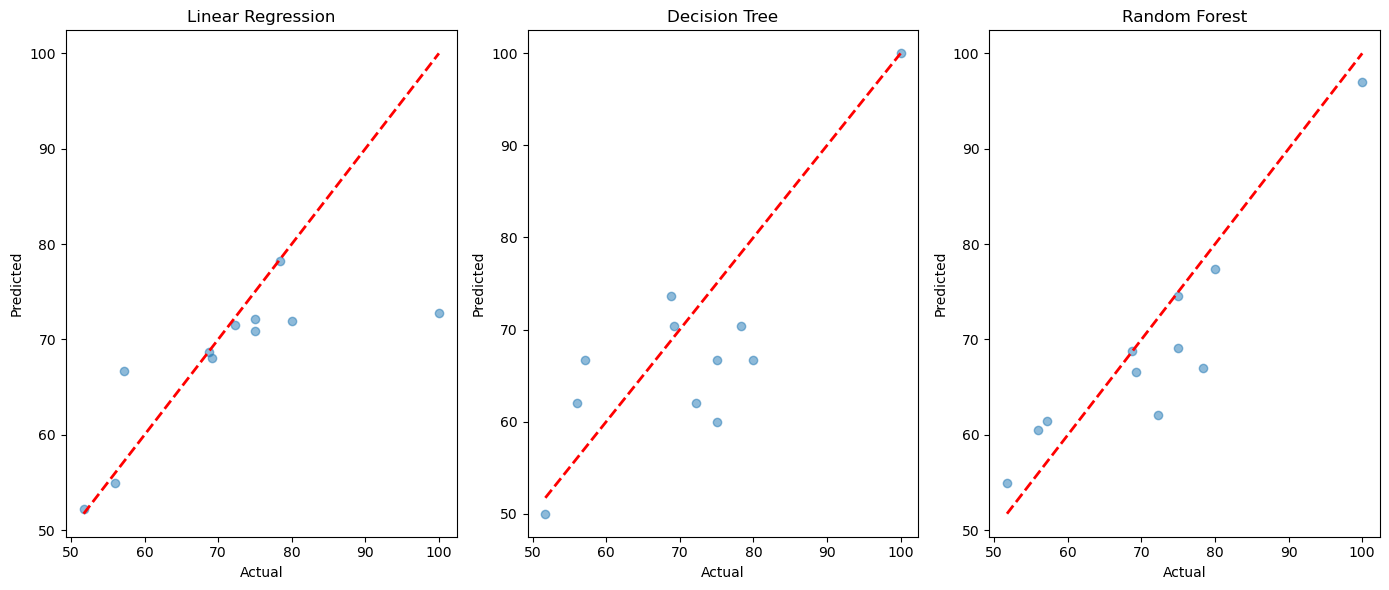

In [17]:
# Visualize actual vs predicted values
plt.figure(figsize=(14, 6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, linear_preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

# Decision Tree
plt.subplot(1, 3, 2)
plt.scatter(y_test, tree_preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree')

# Random Forest
plt.subplot(1, 3, 3)
plt.scatter(y_test, forest_preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')

plt.tight_layout()
plt.show()

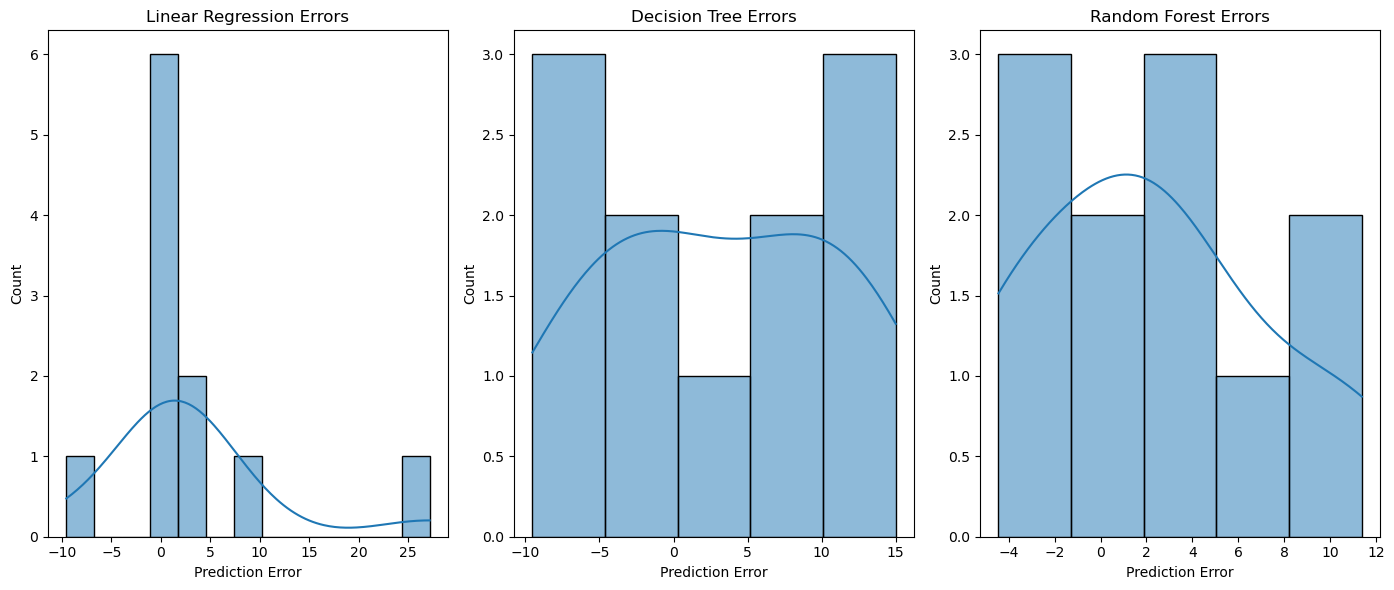

In [18]:
# Analyze model prediction errors
plt.figure(figsize=(14, 6))

# Linear Regression errors
plt.subplot(1, 3, 1)
linear_errors = y_test - linear_preds
sns.histplot(linear_errors, kde=True)
plt.xlabel('Prediction Error')
plt.title('Linear Regression Errors')

# Decision Tree errors
plt.subplot(1, 3, 2)
tree_errors = y_test - tree_preds
sns.histplot(tree_errors, kde=True)
plt.xlabel('Prediction Error')
plt.title('Decision Tree Errors')

# Random Forest errors
plt.subplot(1, 3, 3)
forest_errors = y_test - forest_preds
sns.histplot(forest_errors, kde=True)
plt.xlabel('Prediction Error')
plt.title('Random Forest Errors')

plt.tight_layout()
plt.show()